In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
file_path = '/mnt/data/laptop_prices.csv'
df = pd.read_csv('laptop_prices.csv')



In [10]:
print("Dataset Head:\n", df.head())
print("\nDataset Info:\n")
df.info()
print("\nMissing Values:\n", df.isnull().sum())

Dataset Head:
     Brand    Processor  RAM (GB)    Storage                 GPU  \
0   Apple  AMD Ryzen 3        64  512GB SSD     Nvidia GTX 1650   
1   Razer  AMD Ryzen 7         4    1TB SSD     Nvidia RTX 3080   
2    Asus     Intel i5        32    2TB SSD     Nvidia RTX 3060   
3  Lenovo     Intel i5         4  256GB SSD     Nvidia RTX 3080   
4   Razer     Intel i3         4  256GB SSD  AMD Radeon RX 6600   

   Screen Size (inch) Resolution  Battery Life (hours)  Weight (kg)  \
0                17.3  2560x1440                   8.9         1.42   
1                14.0   1366x768                   9.4         2.57   
2                13.3  3840x2160                   8.5         1.74   
3                13.3   1366x768                  10.5         3.10   
4                16.0  3840x2160                   5.7         3.38   

  Operating System  Price ($)  
0          FreeDOS    3997.07  
1            Linux    1355.78  
2          FreeDOS    2673.07  
3          Windows     751.

In [11]:
df.drop_duplicates(inplace=True)

In [14]:
print("\nColumns in Dataset:\n", df.columns)


Columns in Dataset:
 Index(['Brand', 'Processor', 'RAM (GB)', 'Storage', 'GPU',
       'Screen Size (inch)', 'Resolution', 'Battery Life (hours)',
       'Weight (kg)', 'Operating System', 'Price ($)'],
      dtype='object')


In [16]:
# Check if 'Price' column exists before proceeding
if 'Price' in df.columns:
    # Statistical Summary
    print("\nStatistical Summary:\n", df['Price'].describe())


In [21]:
df.drop_duplicates(inplace=True)

In [32]:
df = df.ffill() 

In [33]:
df.columns = df.columns.str.strip()
print("\nColumns in Dataset:\n", df.columns)



Columns in Dataset:
 Index(['Brand', 'Processor', 'RAM (GB)', 'Storage', 'GPU',
       'Screen Size (inch)', 'Resolution', 'Battery Life (hours)',
       'Weight (kg)', 'Operating System', 'Price ($)'],
      dtype='object')


In [35]:

column_mappings = {
    'Price ($)': 'Price',
    'RAM (GB)': 'RAM',
    'Screen Size (inch)': 'Screen_Size',
    'Battery Life (hours)': 'Battery_Life',
    'Weight (kg)': 'Weight'
}
df.rename(columns=column_mappings, inplace=True)

In [36]:
expected_columns = set(column_mappings.values())
actual_columns = set(df.columns)
missing_columns = expected_columns - actual_columns
if missing_columns:
    print("\nWarning: The following expected columns are missing in the dataset:", missing_columns)
else:
    print("\nAll expected columns are present.")


All expected columns are present.


In [37]:
if 'Price' in df.columns:
    # Statistical Summary
    print("\nStatistical Summary:\n", df['Price'].describe())


Statistical Summary:
 count    11768.000000
mean      2183.571608
std       1316.886132
min        279.570000
25%       1272.045000
50%       1840.865000
75%       2698.370000
max      10807.880000
Name: Price, dtype: float64


In [41]:
print(df.columns)  # Check column names


Index(['Brand', 'Processor', 'RAM', 'Storage', 'GPU', 'Screen_Size',
       'Resolution', 'Battery_Life', 'Weight', 'Operating System', 'Price'],
      dtype='object')


In [42]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  # Convert to numeric
df.dropna(subset=['Price'], inplace=True)  # Remove NaN values if any


<Axes: xlabel='Price', ylabel='Count'>

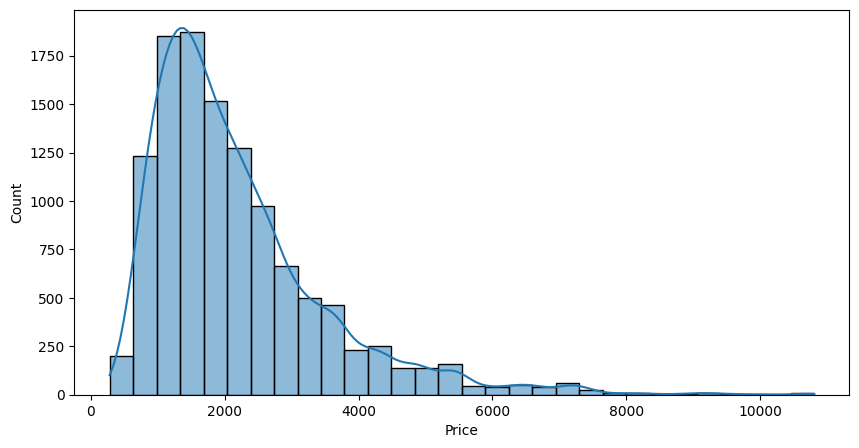

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=30, kde=True)


In [45]:
print(df.shape)  # Check the number of rows and columns
print(df['Price'].head())  # Print the first few values of the Price column
print(df['Price'].isnull().sum())  # Check for missing values


(11768, 11)
0    3997.07
1    1355.78
2    2673.07
3     751.17
4    2059.83
Name: Price, dtype: float64
0


In [46]:
print(df['Price'].dtype)  # Check the data type


float64


In [48]:
print(df['Price'].describe())


count    11768.000000
mean      2183.571608
std       1316.886132
min        279.570000
25%       1272.045000
50%       1840.865000
75%       2698.370000
max      10807.880000
Name: Price, dtype: float64


In [49]:
print(df['Price'].min(), df['Price'].max())
print(df['Price'].head(10))  # Check first 10 values


279.57 10807.88
0    3997.07
1    1355.78
2    2673.07
3     751.17
4    2059.83
5    1676.64
6    1449.05
7    2193.55
8    6409.03
9    1556.72
Name: Price, dtype: float64


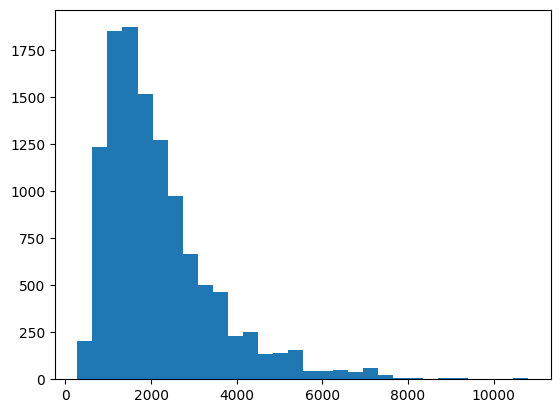

In [50]:
plt.hist(df['Price'], bins=30)
plt.show()


In [51]:
df['Price'] = df['Price'] / df['Price'].max()  # Normalize to 0-1 range


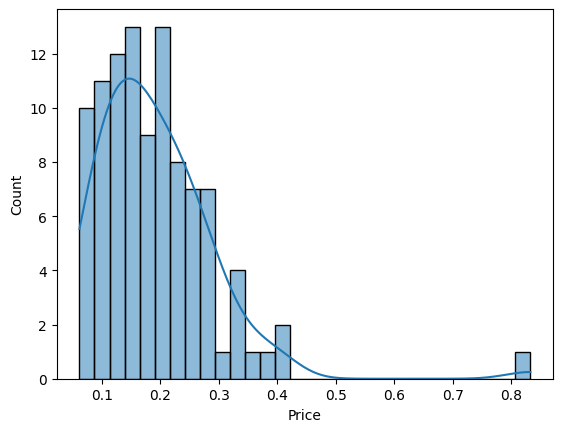

In [52]:
sample_df = df.sample(100)  # Random 100 samples
sns.histplot(sample_df['Price'], bins=30, kde=True)
plt.show()



Statistical Summary:
 count    11768.000000
mean         0.202035
std          0.121845
min          0.025867
25%          0.117696
50%          0.170326
75%          0.249667
max          1.000000
Name: Price, dtype: float64


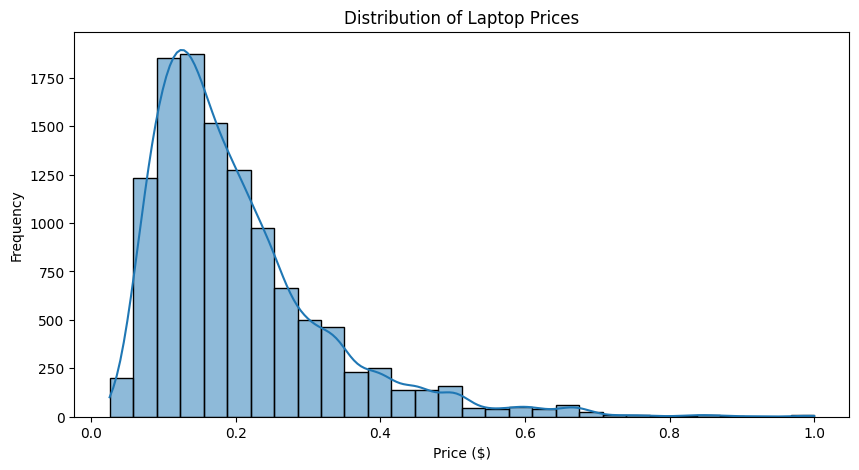

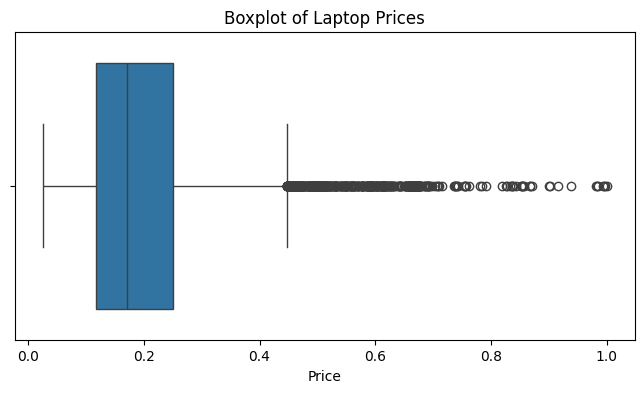

In [53]:
if 'Price' in df.columns:
    # Statistical Summary
    print("\nStatistical Summary:\n", df['Price'].describe())

    # Exploratory Data Analysis (EDA)
    # Distribution of laptop prices
    plt.figure(figsize=(10, 5))
    sns.histplot(df['Price'].dropna(), bins=30, kde=True)
    plt.title('Distribution of Laptop Prices')
    plt.xlabel('Price ($)')
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot to check for outliers
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df['Price'].dropna())
    plt.title('Boxplot of Laptop Prices')
    plt.show()
else:
    print("\nColumn 'Price' not found in the dataset. Please check the dataset structure.")

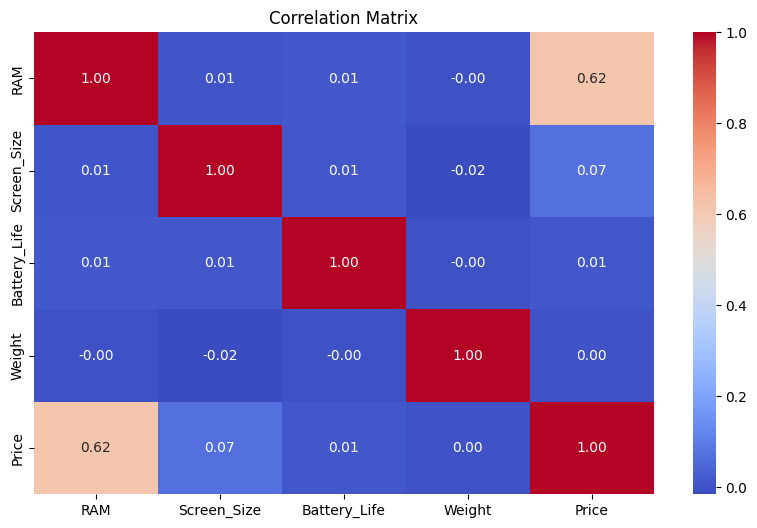

In [54]:
if not df.empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

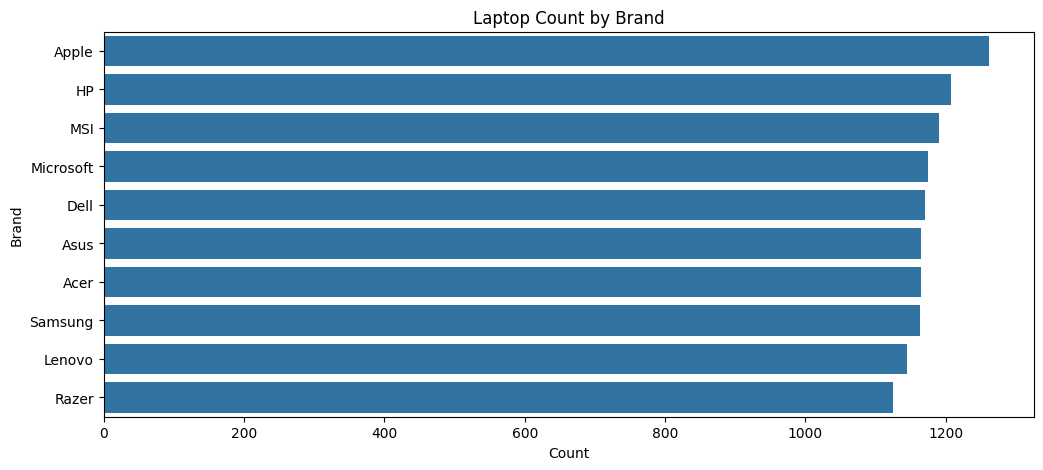

In [55]:
if 'Brand' in df.columns:
    plt.figure(figsize=(12, 5))
    sns.countplot(y=df['Brand'], order=df['Brand'].value_counts().index)
    plt.title('Laptop Count by Brand')
    plt.xlabel('Count')
    plt.ylabel('Brand')
    plt.show()

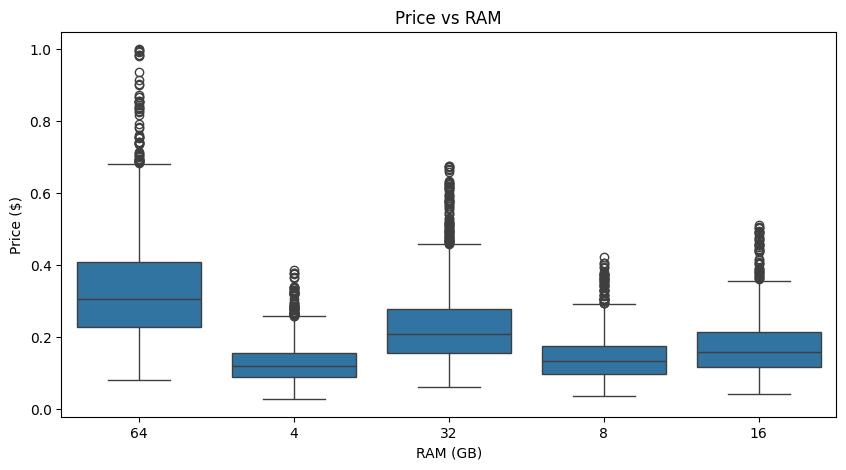

In [56]:
if 'RAM' in df.columns and 'Price' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df['RAM'].astype(str), y=df['Price'])
    plt.title('Price vs RAM')
    plt.xlabel('RAM (GB)')
    plt.ylabel('Price ($)')
    plt.show()

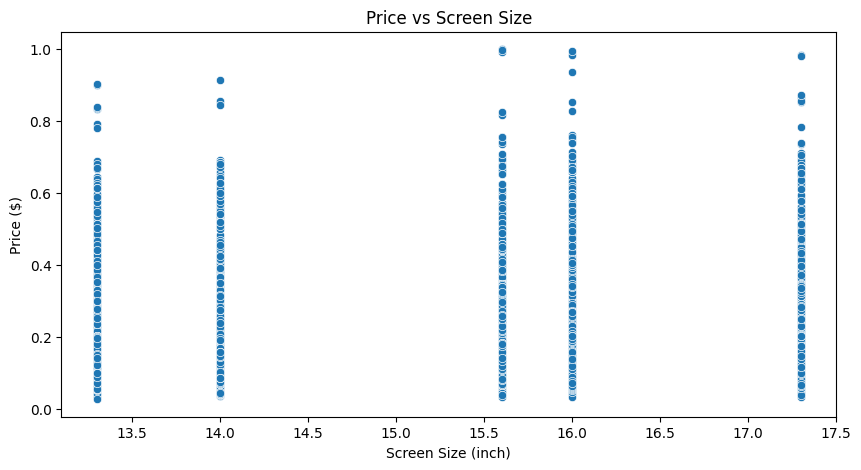

In [57]:
if 'Screen_Size' in df.columns and 'Price' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=df['Screen_Size'], y=df['Price'])
    plt.title('Price vs Screen Size')
    plt.xlabel('Screen Size (inch)')
    plt.ylabel('Price ($)')
    plt.show()

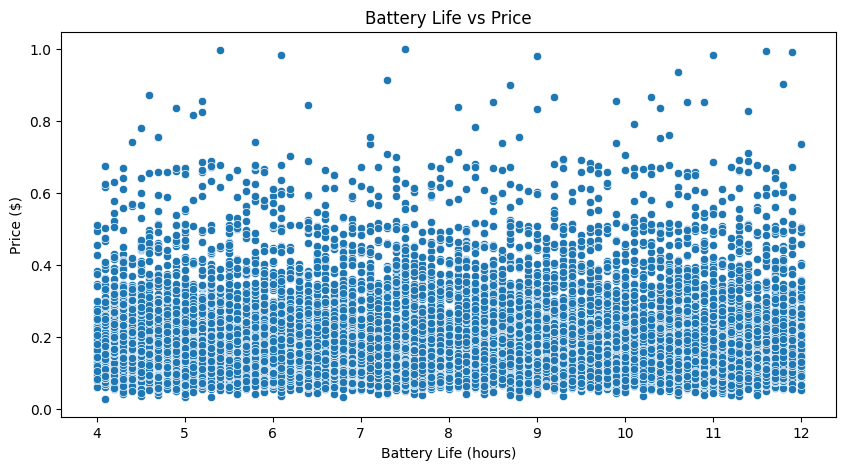

In [58]:
if 'Battery_Life' in df.columns and 'Price' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=df['Battery_Life'], y=df['Price'])
    plt.title('Battery Life vs Price')
    plt.xlabel('Battery Life (hours)')
    plt.ylabel('Price ($)')
    plt.show()
